In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
eps=0.001
alfa=200
funk=0
grad=0
ges=0
it=0
iter=237
alif=100
def roz(x):
  global funk
  funk+=1
  return alif*(x[0]**2-x[1])**2+(x[0]-1)**2

def squ(x):
  global funk
  funk+=1
  return 5*x[0]*x[0] + 4*x[0]*x[1]+2*x[1]*x[1]+4*math.sqrt(5)*(x[0]+x[1])-14
def gold(epsg,point,roz,antigr):
    a=5
    b=-5
    delt=(b-a)*(math.sqrt(5)-2)/2
    x1=(a+b)/2 -delt
    x2=(a+b)/2 +delt
    f1=roz(point + x1 * antigr)
    f2=roz(point + x2 * antigr)
    while(math.fabs(b-a)>=epsg):
        if(f1<f2):
            b=x2
            x2=x1
            x1=a+b-x2
            f2=f1
            f1=roz(point + x1 * antigr)
        else:
            a=x1
            x1=x2
            x2=a+b-x1
            f1=f2
            f2=roz(point + x2 * antigr)
        delt=(b-a)*(math.sqrt(5)-2)/2
    return (a+b)/2

def antigrad(x,roz):
    global grad
    grad+=1
    if(roz([1,1])<0.000001):
      return np.array([-alif*4*x[0]*(x[0]**2-x[1])-2*(x[0]-1), alif*2*(x[0]**2-x[1])])
    else:
      return np.array([-10*x[0]-4*x[1]-4*math.sqrt(5), -4*x[0] -4*x[1]-4*math.sqrt(5)])

def norm(x):
    nor=0
    for i in range(2):
        nor +=x[i]*x[i]
    return math.sqrt(nor)

def H(x,roz):
  global ges
  ges+=1
  if(roz([1,1])<0.000001):
    return np.array([[4*alif*(x[0]**2-x[1])+4*alif*x[0]*2*x[0]+2,-4*alif*x[0]],[-2*alif*2*x[0], 2*alif]])
  return np.array([[10,4],[4,4]])

def polop(a):
  if(a[0][0]>0 and (a[0][0]*a[1][1] - a[1][0]*a[0][1])>0):
    return True
  return False


def dfp(x0,roz):
  global unsv1
  k=0
  ant=antigrad(x0,roz)
  A=np.eye(2)
  unsv1.append(x0)
  while(norm(ant)>eps):

    k+=1

    p=A.dot(ant)
    cappa=gold(0.0001,x0,roz,p)
    x=x0+cappa*p
    if(k%100==0):
      A=np.eye(2)
    else:
      dx=np.array([x-x0])
      dg=np.array([antigrad(x,roz)-ant])
      dx1=x-x0
      dg1=antigrad(x,roz)-ant
      adg=np.array(A@dg1)
      adg1=np.array([A@dg1])
      #if(abs(np.dot(dg1, dx1))>0.1 and abs(np.dot(adg, dg1))>0.1):

      A = A-((dx.T)@dx)/np.dot(dg1,dx1) - ((adg1.T)@adg1)/np.dot(adg,dg1)
    x0=x
    unsv1.append(x0)
    ant=antigrad(x0,roz)
  print(x0)
  print(k)

def bpgsh(x0,roz):
  global unsv2
  k=0
  ant=antigrad(x0,roz)
  A=np.eye(2)
  unsv2.append(x0)
  while(norm(ant)>eps):
    k+=1
    A=np.eye(2)
    p=A.dot(ant)
    cappa=gold(0.0001,x0,roz,p)
    x=x0+cappa*p
    if(k%2==0):
      A=np.eye(2)
    else:
      dx=np.array([x-x0])
      dg=np.array([antigrad(x,roz)-ant])
      dx1=x-x0
      dg1=antigrad(x,roz)-ant
      adg=np.array(A@dg1)
      adg1=np.array([A@dg1])
      r= adg1/np.dot(adg,dg1) - dx1/np.dot(dg1,dx1)

      #print((dx@(dx.T))/np.dot(dg1,dx1) - (adg1@(adg1.T))/np.dot(adg,dg1) - np.array([np.dot(adg,dg1)])@r@(r.T))
      A = A-((dx.T)@dx)/np.dot(dg1,dx1) - ((adg1.T)@adg1)/np.dot(adg,dg1) - np.array([np.dot(adg,dg1)])*(r.T)@r

    x0=x
    unsv2.append(x0)
    ant=antigrad(x0,roz)
  print(x0)
  print(min(iter,k))

def paul(x0,roz):
  global unsv3
  k=0
  ant=antigrad(x0,roz)
  A=np.eye(2)
  unsv3.append(x0)
  while(norm(ant)>eps):
    k+=1

    p=A.dot(ant)
    cappa=gold(0.0001,x0,roz,p)
    x=x0+cappa*p
    if(k%10==0):
      A=np.eye(2)
    else:
      dx=np.array([x-x0])
      dg=np.array([antigrad(x,roz)-ant])
      dx1=x-x0
      dg1=antigrad(x,roz)-ant
      adg=np.array(A@dg1)
      #adg1=np.array([A@dg1])
      adg1=A@dg1
      dx2=np.array(dx+adg)
      dx21=dx1+adg1
      if(abs(np.dot(dg1, dx21))>0.1):

        A = A-((dx2.T)@dx2)/np.dot(dg1,dx21)

      # else:
      #   A=np.eye(2)
      #A = A-((dx2.T)@dx2)/np.dot(dg1,dx21)

    x0=x
    unsv3.append(x0)
    ant=antigrad(x0,roz)

  print(x0)
  print(k)

def mac(x0,roz):
  global unsv4,iter

  k=0
  ant=antigrad(x0,roz)
  A=np.eye(2)
  unsv4.append(x0)
  while(norm(ant)>eps):
    k+=1

    p=A.dot(ant)
    cappa=gold(0.0001,x0,roz,p)
    x=x0+cappa*p
    if(k%2==0):
      A=np.eye(2)
    else:
      dx=np.array([x-x0])
      dg=np.array([antigrad(x,roz)-ant])
      dx1=x-x0
      dg1=antigrad(x,roz)-ant
      adg=np.array(A@dg1)
      adg1=np.array([A@dg1])
      #if(abs(np.dot(dg1,dx1))>0.1 or abs(np.dot((dx1.T),dg1))>0.1):

      A = A-((dx.T)@dx)/np.dot(dg1,dx1) - ((adg1.T)@dx)/np.dot((dx1.T),dg1)
      #else:
        #A=np.eye(2)

    x0=x
    unsv4.append(x0)

    ant=antigrad(x0,roz)
  #k=min(k,iter*2)
  print(x0)
  print(k)


x0=np.array([-1,-2])
unsv1=[]
unsv2=[]
unsv3=[]
unsv4=[]

dfp(x0,roz)
bpgsh(x0,roz)
paul(x0,roz)
mac(x0,roz)

#dfp(x0,squ)
bpgsh(x0,squ)
paul(x0,squ)
mac(x0,squ)

[1.00000012 1.00000025]
45
[1.00109693 1.0021997 ]
237
[1.00036451 1.00073094]
217
[1.00099686 1.0019977 ]
5784
[-8.67651321e-05 -2.23588391e+00]
7
[ 3.90920024e-06 -2.23609257e+00]
2
[-8.67642631e-05 -2.23588391e+00]
7


<a list of 45 text.Text objects>

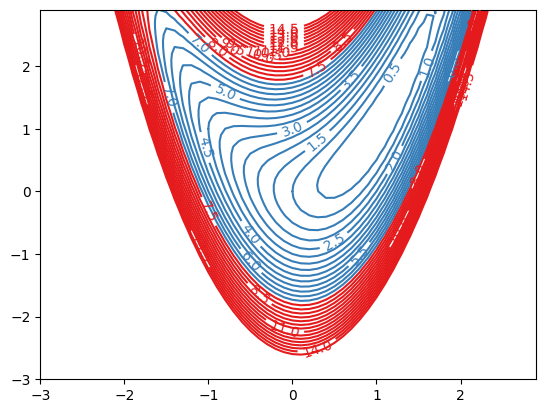

In [ ]:
from sympy import Symbol
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
dimention = 2
z = [Symbol('z_'+str(i+1)) for i in range(dimention)]
func = 2*(z[0]**2 - z[1])**2 + (z[0] - 1)**2
X_0 = [-1,1]

def func_def(f):
    return lambda x: f.subs(list(zip(z,x)))
x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)

Z = np.ones((60,60))
X, Y = np.meshgrid(x, y)
for i in range(len(X)):
 for j in range(len(X[0])):
    Z[i][j]=func_def(func)([X[i][j], Y[i][j]])
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)


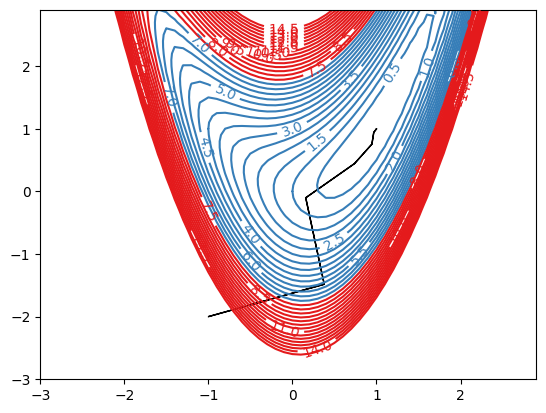

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv1:
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')


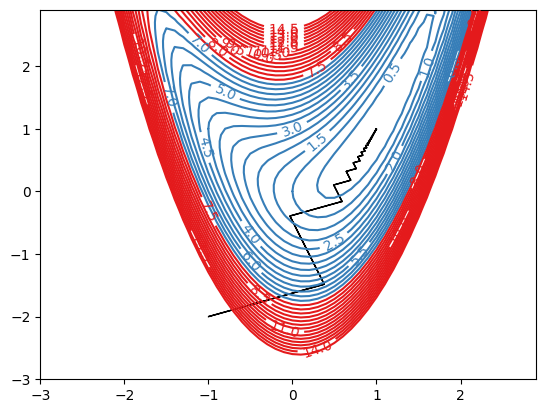

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv2:
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

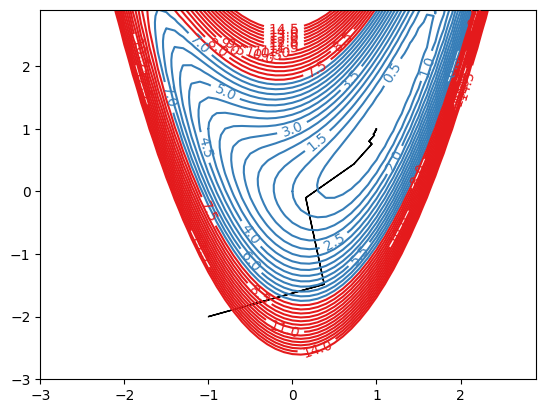

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv3:
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

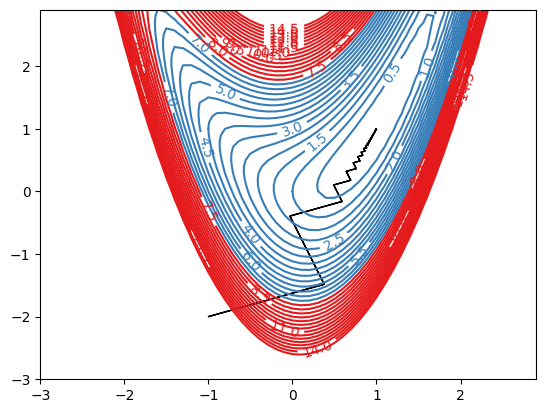

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv4:
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

<a list of 95 text.Text objects>

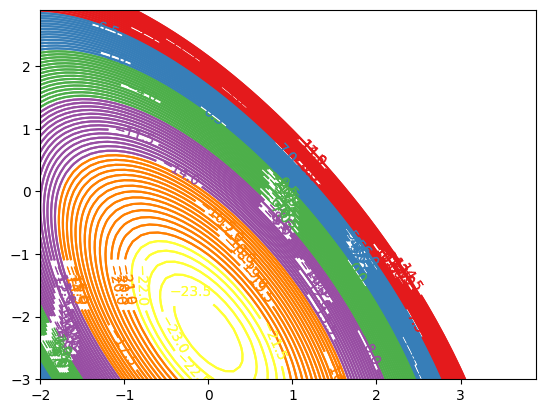

In [ ]:
from sympy import Symbol
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
dimention = 2
z = [Symbol('z_'+str(i+1)) for i in range(dimention)]
func = 5*z[0]*z[0] + 4*z[0]*z[1]+2*z[1]*z[1]+4*math.sqrt(5)*(z[0]+z[1])-14

X_0 = [-1,1]

def func_def(f):
    return lambda x: f.subs(list(zip(z,x)))
x = np.arange(-2.0, 4.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)

Z = np.ones((60,60))
X, Y = np.meshgrid(x, y)
for i in range(len(X)):
 for j in range(len(X[0])):
    Z[i][j]=func_def(func)([X[i][j], Y[i][j]])
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

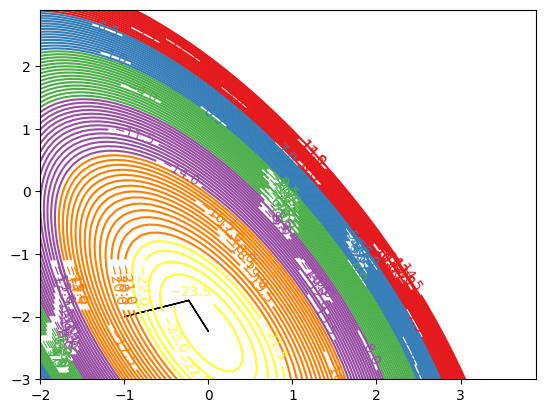

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv1:
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

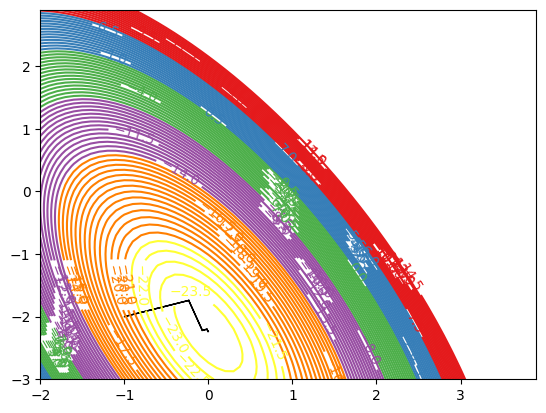

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv2:
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

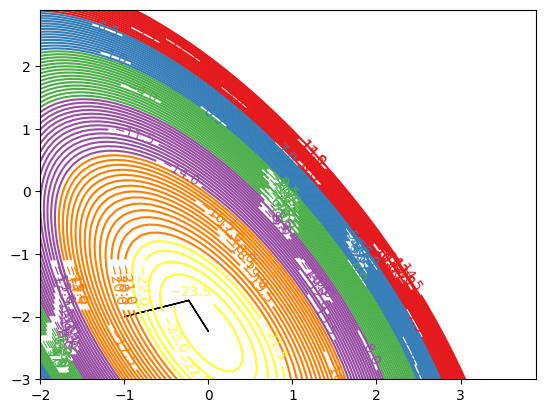

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv3:
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

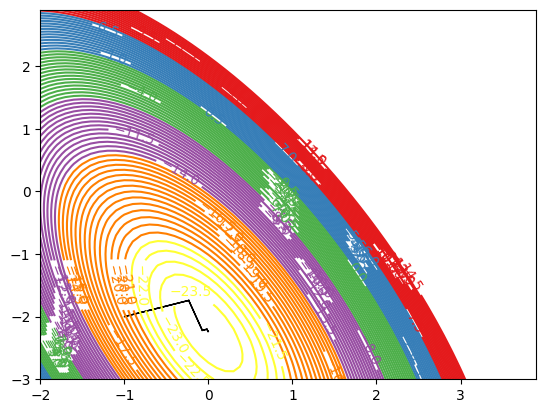

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv4:
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

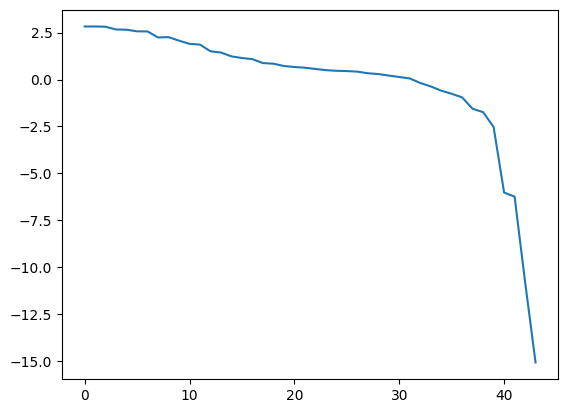

In [ ]:
k=np.arange(0,len(unsv1)-2,1)
s=[]
for i in range(2,len(unsv1)):
  unsv1[i][0]-=1
  unsv1[i][1]-=1
  s.append(norm(unsv1[i]))

plt.plot(k,np.log(s))
#plt.scatter(np.log(k),log ,color = 'y')
plt.show()